## 5.9 バックプロパゲーションの実装 -回帰-

### 5.9.5 全体のコード

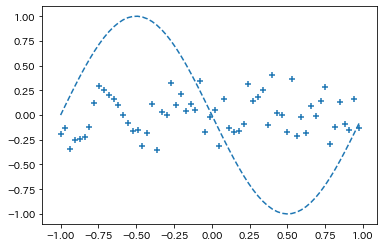

Epoch:0/2001 Error:0.27889316738922265


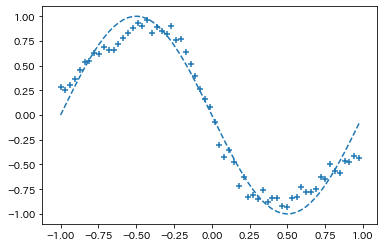

Epoch:200/2001 Error:0.008406378561348318


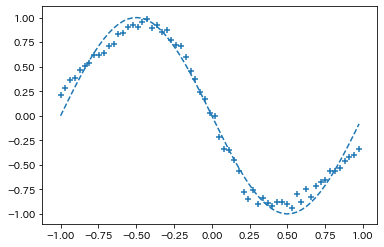

Epoch:400/2001 Error:0.00509176197717736


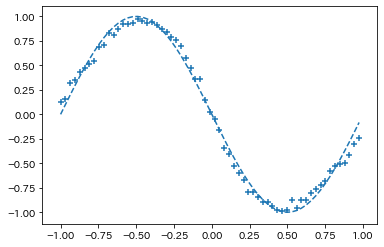

Epoch:600/2001 Error:0.002250250210239766


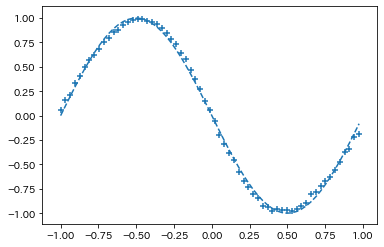

Epoch:800/2001 Error:0.0007371399720002958


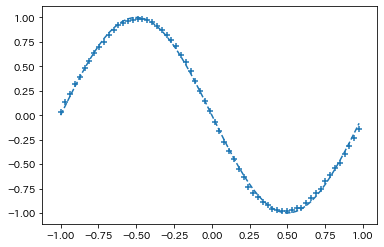

Epoch:1000/2001 Error:0.00026434942744821196


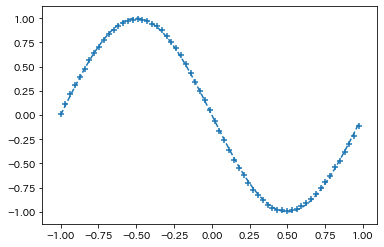

Epoch:1200/2001 Error:8.86806808753469e-05


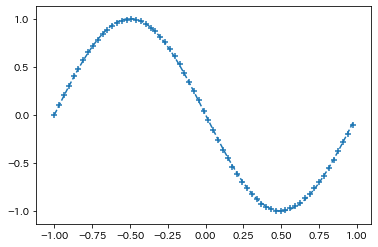

Epoch:1400/2001 Error:3.290885574855262e-05


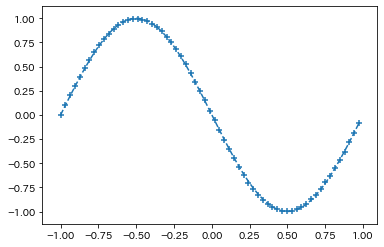

Epoch:1600/2001 Error:1.8337152171901996e-05


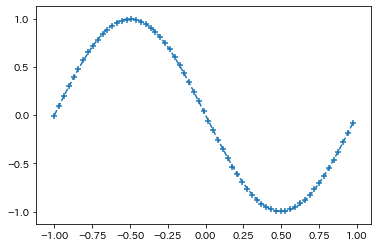

Epoch:1800/2001 Error:1.291057636164107e-05


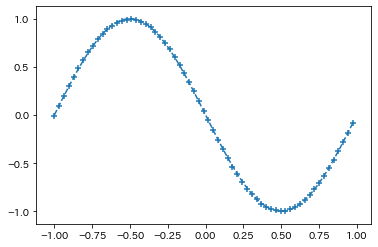

Epoch:2000/2001 Error:9.925969763401788e-06


In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# -- 入力と正解の用意 --
input_data = np.arange(0, np.pi*2, 0.1)  # 入力
correct_data = np.sin(input_data)  # 正解
input_data = (input_data-np.pi)/np.pi  # 入力を-1.0-1.0の範囲に収める
n_data = len(correct_data)  # データ数

# -- 各設定値 --
n_in = 1  # 入力層のニューロン数
n_mid = 3  # 中間層のニューロン数
n_out = 1  # 出力層のニューロン数

wb_width = 0.01  # 重みとバイアスの広がり具合
eta = 0.1  # 学習係数
epoch = 2001
interval = 200  # 経過の表示間隔

# -- 中間層 --
class MiddleLayer:
    def __init__(self, n_upper, n):  # 初期設定
        self.w = wb_width * np.random.randn(n_upper, n)  # 重み（行列）
        self.b = wb_width * np.random.randn(n)  # バイアス（ベクトル）

    def forward(self, x):  # 順伝播
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1/(1+np.exp(-u))  # シグモイド関数
    
    def backward(self, grad_y):  # 逆伝播
        delta = grad_y * (1-self.y)*self.y  # シグモイド関数の微分
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T) 
        
    def update(self, eta):  # 重みとバイアスの更新
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

# -- 出力層 --
class OutputLayer:
    def __init__(self, n_upper, n):  # 初期設定
        self.w = wb_width * np.random.randn(n_upper, n)  # 重み（行列）
        self.b = wb_width * np.random.randn(n)  # バイアス（ベクトル）
    
    def forward(self, x):  # 順伝播
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = u  # 恒等関数
    
    def backward(self, t):  # 逆伝播
        delta = self.y - t
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T) 

    def update(self, eta):  # 重みとバイアスの更新
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b


# -- 各層の初期化 --
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

# -- 学習 --
for i in range(epoch):

    # インデックスをシャッフル
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    # 結果の表示用
    total_error = 0
    plot_x = []
    plot_y = []
    
    for idx in index_random:
        
        x = input_data[idx:idx+1]  # 入力
        t = correct_data[idx:idx+1]  # 正解
        
        # 順伝播
        middle_layer.forward(x.reshape(1, 1))  # 入力を行列に変換
        output_layer.forward(middle_layer.y)  

        # 逆伝播
        output_layer.backward(t.reshape(1, 1))  # 正解を行列に変換
        middle_layer.backward(output_layer.grad_x)
        
        # 重みとバイアスの更新
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i%interval == 0:
            
            y = output_layer.y.reshape(-1)  # 行列をベクトルに戻す

            # 誤差の計算
            total_error += 1.0/2.0*np.sum(np.square(y - t))  # 二乗和誤差
            
            # 出力の記録
            plot_x.append(x)
            plot_y.append(y)
            
    if i%interval == 0:
        
        # 出力のグラフ表示
        plt.plot(input_data, correct_data, linestyle="dashed")
        plt.scatter(plot_x, plot_y, marker="+")
        plt.show()
        
        # エポック数と誤差の表示
        print("Epoch:" + str(i) + "/" + str(epoch), "Error:" + str(total_error/n_data))